# College Dataset

In [2]:
import pandas as pd
college = pd.read_csv('/content/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# x and y split
x = college.drop(['Private','Unnamed: 0'],axis=1)
y = college['Private']

<Axes: >

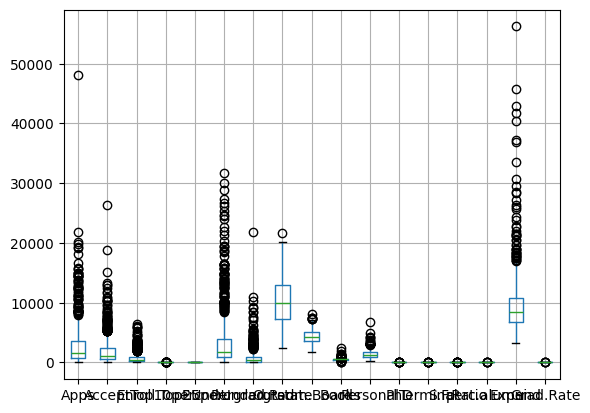

In [4]:
x.boxplot()

In [5]:
#Scaling x and Encoding y before building model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

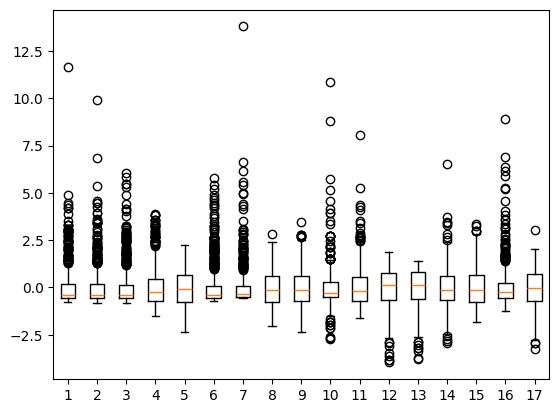

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(x)
plt.show()

In [35]:
# Encoding y
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [36]:
# Train and test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<Axes: ylabel='count'>

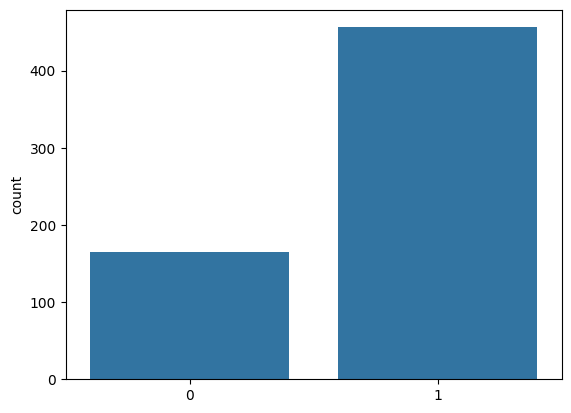

In [37]:
import seaborn as sns
sns.countplot(x=y_train)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((621, 17), (156, 17), (621,), (156,))

In [39]:
# Resample imbalanced data (SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

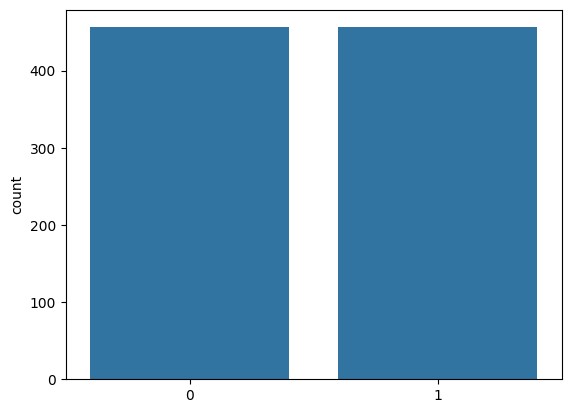

In [40]:
sns.countplot(x=y_train)

In [41]:
# Build a Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
model.coef_

array([[-1.34517124,  0.01621011,  0.15427756,  0.23366593,  0.18134404,
        -1.25595242,  0.10046122,  2.6073665 ,  0.30605508,  0.30701502,
        -0.25841442, -1.15077153, -0.47930133, -0.27073471,  0.65486977,
         1.00121796,  0.36766379]])

In [16]:
model.intercept_

array([2.25124356])

In [20]:
# Evaluate the results (accuracy_score, confusion_matrix, classification_report)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.9230769230769231
[[ 43   4]
 [  8 101]]
              precision    recall  f1-score   support

          No       0.84      0.91      0.88        47
         Yes       0.96      0.93      0.94       109

    accuracy                           0.92       156
   macro avg       0.90      0.92      0.91       156
weighted avg       0.93      0.92      0.92       156



In [47]:
# Build a NN Model (First layer: 10 nodes, with relu activation, 2nd layer: 10 nodes, with relu activation, 3rd layer: output, with sigmoid activation). 신경망모델 구축
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 10)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compile the model (loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']). 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
# Fit the model (epoch=500). 모델훈련
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5008 - loss: 0.7175
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6892 - loss: 0.6410
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8240 - loss: 0.5630
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8489 - loss: 0.5025
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9016 - loss: 0.4239
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8921 - loss: 0.3762
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9251 - loss: 0.3101
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9257 - loss: 0.2711
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9226 - loss: 0.2506
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9405 - loss: 0.2078
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9356 - loss: 0.2137
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

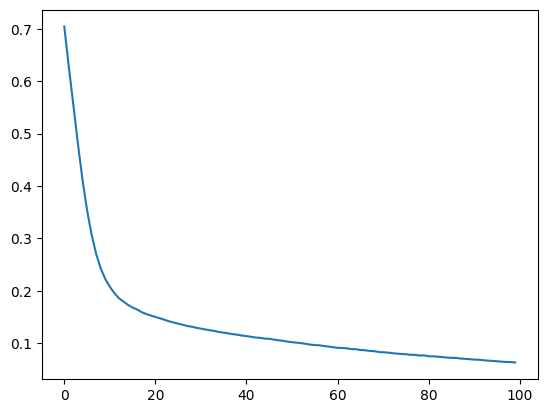

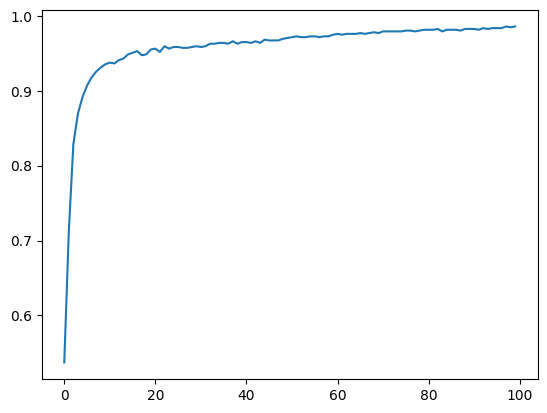

In [51]:
#  히스토리 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.show()

# Fashion MNIST 예제

In [52]:
# Load fashion_mnist dataset and split it into train and test set (keras.datasets.fashion_mnist).
from keras.datasets import fashion_mnist

In [53]:
# 패션이미지를 가지고 와서 훈련, 테스트세트로 분리
from keras.datasets import fashion_mnist

# 데이터 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)  # (60000, 28, 28)
print(x_test.shape)   # (10000, 28, 28)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


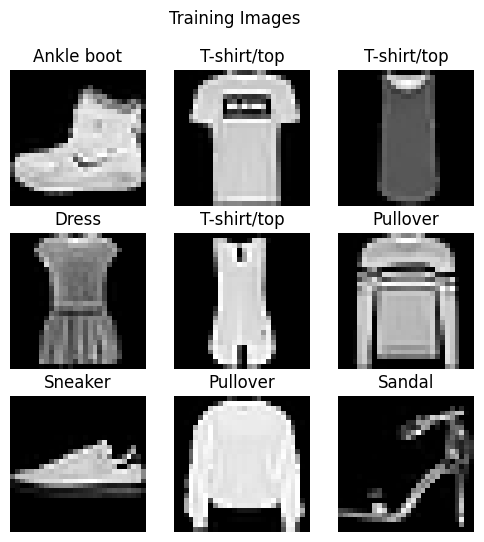

In [54]:
# §Exploratory data analysis (imshow of 9 images of train and the 9 images of test, shape of train and test, and number of classes and names of classes). 데이터 탐색

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.suptitle("Training Images")
plt.show()




In [57]:
# §Data preprocessing
# reshape
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
# divided by 255 to normalize
x_train = x_train/255.0
x_test = x_test/255.0

In [59]:
# 라벨 인코딩
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# §Compile the model. 컴파일 모델
# §loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy’]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# §Fit the model. 모델훈련
history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 63ms/step - accuracy: 0.7326 - loss: 1.0074
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8558 - loss: 0.3951
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.8737 - loss: 0.3427
Epoch 4/20
510/938 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.8903 - loss: 0.2961

In [ ]:

# §batch_size=64, epochs=20, verbose=1
# §

# §Prediction. 예측
# §y_pred = model.predict_classes(x_test)